https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
data = pd.read_csv('./data/bank.csv', header=0, sep=';')
data.dropna()
print(data.shape)
print(list(data.columns))

(4521, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
data['education'].unique()

filteredData = data[data['pdays']!= -1]

filteredData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [7]:
filteredData['y'].unique()

array(['no', 'yes'], dtype=object)

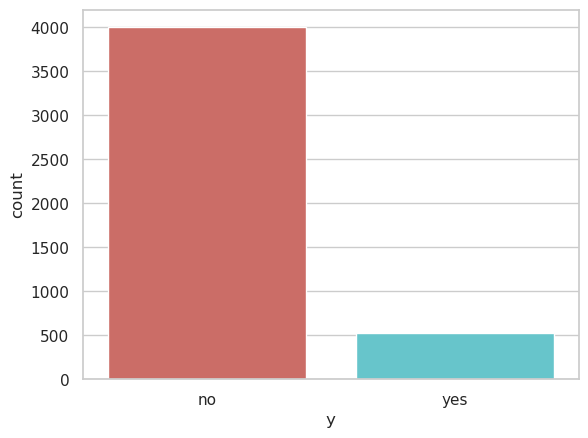

<Figure size 640x480 with 0 Axes>

In [8]:
data['y'].value_counts()
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

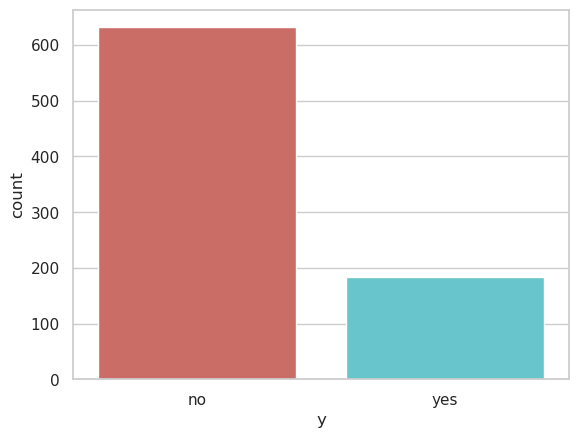

<Figure size 640x480 with 0 Axes>

In [9]:
filteredData['y'].value_counts()
sns.countplot(x='y', data=filteredData, palette='hls')
plt.show()
plt.savefig('count_plot')

In [10]:
count_no_sub = len(filteredData[filteredData['y']=='no'])
count_sub = len(filteredData[filteredData['y']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 77.45098039215686
percentage of subscription 22.54901960784314


In [11]:
filteredData.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,41.077532,1635.335443,14.387658,228.300633,2.061709,233.215190,2.982595
yes,43.228261,1654.565217,15.309783,423.864130,1.858696,196.184783,3.086957


In [12]:
filteredData.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,40.379630,1190.796296,16.212963,257.796296,1.953704,224.694444,2.851852
blue-collar,40.473684,1156.526316,13.625000,283.361842,2.026316,264.072368,3.072368
entrepreneur,42.347826,886.347826,12.304348,276.652174,2.695652,242.043478,3.130435
housemaid,47.000000,3032.222222,15.388889,320.222222,2.000000,169.500000,2.222222
management,39.344086,2150.118280,14.381720,284.150538,2.037634,217.639785,2.860215
retired,67.163265,2415.959184,15.326531,311.918367,1.714286,168.326531,2.775510
self-employed,43.678571,1442.464286,14.464286,199.785714,2.000000,190.214286,3.857143
services,38.709677,1608.629032,12.500000,247.080645,2.290323,250.354839,2.983871
student,26.772727,2503.272727,15.954545,211.909091,2.136364,177.363636,3.681818


In [13]:
filteredData.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,46.764706,1549.152941,13.952941,292.458824,1.858824,246.400000,2.729412
married,44.264228,1488.638211,14.619919,265.353659,2.050813,223.367886,2.951220
single,34.150628,1982.778243,14.774059,279.765690,2.000000,220.288703,3.217573


In [14]:
filteredData.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,49.336735,1406.887755,14.387755,258.877551,1.826531,248.540816,3.183673
secondary,40.602410,1352.681928,14.566265,278.674699,2.081928,232.012048,2.937349
tertiary,39.511278,2116.368421,14.687970,265.109023,2.033835,206.191729,3.109023
unknown,46.486486,2048.108108,14.810811,290.216216,1.648649,216.243243,2.567568


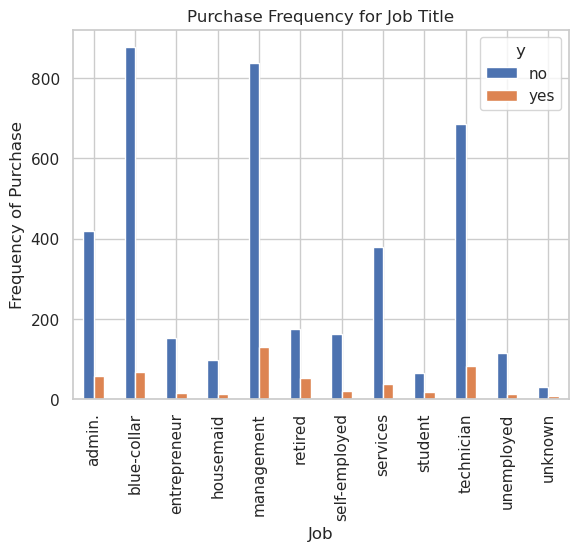

In [15]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

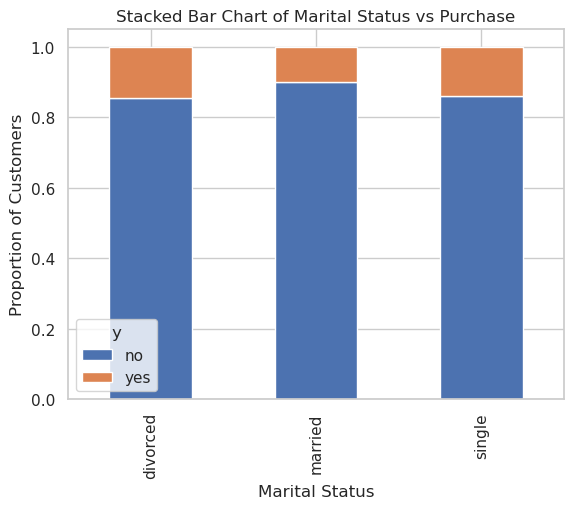

In [16]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')